In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
def load_data():
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist['data'], mnist['target']
    y = y.astype(np.int8)
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def logistic_regression_grid_search(X_train, y_train):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42)),
    ])
    param_grid = {
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs'],
    }
    grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)
    return grid

In [4]:
def decision_tree_grid_search(X_train, y_train):
    pipe = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=42)),
    ])
    param_grid = {
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
    }
    grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)
    return grid

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
CV Best Score: 0.9211964065182263
Test Accuracy: 0.923
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.94      0.97      0.96      1600
           2       0.92      0.90      0.91      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.93      1295
           5       0.88      0.88      0.88      1273
           6       0.95      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.90      0.87      0.89      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



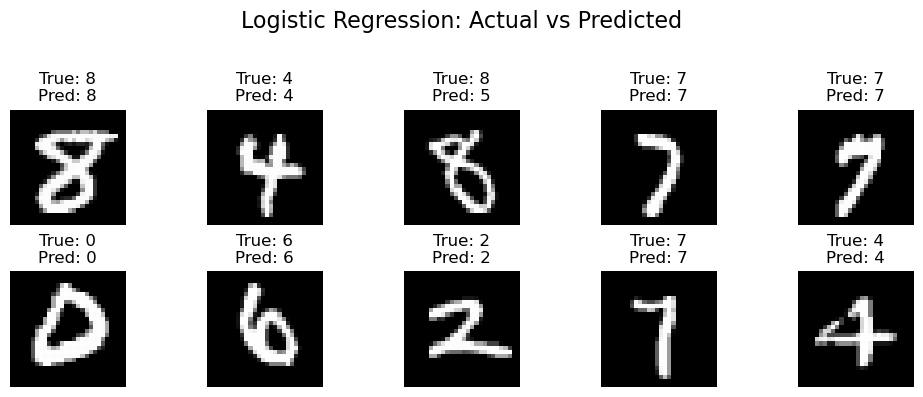

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'clf__max_depth': 20, 'clf__min_samples_split': 2}
CV Best Score: 0.8612856379841514
Test Accuracy: 0.8719285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1343
           1       0.94      0.96      0.95      1600
           2       0.86      0.83      0.85      1380
           3       0.85      0.84      0.84      1433
           4       0.84      0.87      0.86      1295
           5       0.83      0.82      0.83      1273
           6       0.90      0.91      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.81      0.79      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



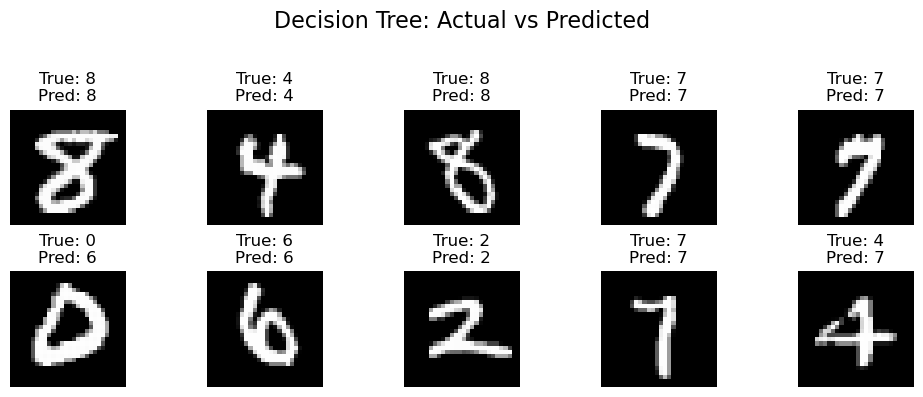

In [5]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Best Parameters:", model.best_params_)
    print("CV Best Score:", model.best_score_)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return y_pred


def visualize_predictions(model_name, X_test, y_test, y_pred, num_images=10):
    plt.figure(figsize=(10, 4))
    for idx in range(num_images):
        image = X_test[idx].reshape(28, 28)
        plt.subplot(2, num_images//2, idx+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.suptitle(f"{model_name}: Actual vs Predicted", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


def main():
    X_train, X_test, y_train, y_test = load_data()

    log_grid = logistic_regression_grid_search(X_train, y_train)
    y_pred_log = evaluate_model(log_grid, X_test, y_test)
    visualize_predictions("Logistic Regression", X_test, y_test, y_pred_log)

    tree_grid = decision_tree_grid_search(X_train, y_train)
    y_pred_tree = evaluate_model(tree_grid, X_test, y_test)
    visualize_predictions("Decision Tree", X_test, y_test, y_pred_tree)

main()